In [27]:
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, UpSampling1D, BatchNormalization, LSTM, RepeatVector
from keras.models import Model
from keras.models import model_from_json
from keras import regularizers
import datetime
import time
import requests as req
import json
import pandas as pd
import pickle
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/anjalichauhan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [28]:
## full log(returns)/returns dataframe
df = pd.read_csv("amzn_cleaned", index_col = 'date', parse_dates = True)

df['pct_change'] = df.close.pct_change()
df['log_ret'] = np.log(df.close) - np.log(df.close.shift(1))
df = df.dropna()

In [29]:
df.head()

,close,volume,roc,rsi,tsi,bb_bbhi,bb_bbli,aroon_down,aroon,aroon_up,...,obv,vpt,fi,nvi,day_sin,day_cos,month_sin,month_cos,pct_change,log_ret
date,,,,,,,,,,,,,,,,,,,,,
2000-07-26,36.0625,15452.1,2.852050,40.134541,-15.064725,0.0,0.0,56.0,-52.0,4.0,...,-71994.0,-1447.166569,-3988.544957,632.201442,-0.743145,0.669131,-0.500000,-0.866025,-0.041528,-0.042415
2000-07-27,31.3750,23576.7,-5.283019,32.699086,-18.375261,0.0,1.0,100.0,-36.0,64.0,...,-95570.7,-3706.260897,-19206.721570,632.201442,-0.587785,0.809017,-0.500000,-0.866025,-0.129983,-0.139242
2000-07-28,30.0000,12444.2,-14.438503,30.891204,-21.659706,0.0,1.0,100.0,-40.0,60.0,...,-108014.9,-3609.925738,-18907.300632,604.495403,-0.406737,0.913545,-0.500000,-0.866025,-0.043825,-0.044814
2000-07-31,30.1250,9478.4,-13.928571,31.263266,-24.163073,0.0,0.0,96.0,-40.0,56.0,...,-98536.5,-505.870013,-16037.000541,607.014133,0.207912,0.978148,-0.500000,-0.866025,0.004167,0.004158
2000-08-01,30.2500,8140.8,-28.823529,31.659494,-26.085806,0.0,0.0,92.0,-40.0,52.0,...,-90395.7,73.272586,-13600.629035,609.532864,0.207912,0.978148,-0.866025,-0.500000,0.004149,0.004141


In [30]:
tts = train_test_split(df, test_size=0.2, shuffle=False)
train = tts[0]
test = tts[1]

In [31]:
train.head()

,close,volume,roc,rsi,tsi,bb_bbhi,bb_bbli,aroon_down,aroon,aroon_up,...,obv,vpt,fi,nvi,day_sin,day_cos,month_sin,month_cos,pct_change,log_ret
date,,,,,,,,,,,,,,,,,,,,,
2000-07-26,36.0625,15452.1,2.852050,40.134541,-15.064725,0.0,0.0,56.0,-52.0,4.0,...,-71994.0,-1447.166569,-3988.544957,632.201442,-0.743145,0.669131,-0.500000,-0.866025,-0.041528,-0.042415
2000-07-27,31.3750,23576.7,-5.283019,32.699086,-18.375261,0.0,1.0,100.0,-36.0,64.0,...,-95570.7,-3706.260897,-19206.721570,632.201442,-0.587785,0.809017,-0.500000,-0.866025,-0.129983,-0.139242
2000-07-28,30.0000,12444.2,-14.438503,30.891204,-21.659706,0.0,1.0,100.0,-40.0,60.0,...,-108014.9,-3609.925738,-18907.300632,604.495403,-0.406737,0.913545,-0.500000,-0.866025,-0.043825,-0.044814
2000-07-31,30.1250,9478.4,-13.928571,31.263266,-24.163073,0.0,0.0,96.0,-40.0,56.0,...,-98536.5,-505.870013,-16037.000541,607.014133,0.207912,0.978148,-0.500000,-0.866025,0.004167,0.004158
2000-08-01,30.2500,8140.8,-28.823529,31.659494,-26.085806,0.0,0.0,92.0,-40.0,52.0,...,-90395.7,73.272586,-13600.629035,609.532864,0.207912,0.978148,-0.866025,-0.500000,0.004149,0.004141


In [32]:
test.head()

,close,volume,roc,rsi,tsi,bb_bbhi,bb_bbli,aroon_down,aroon,aroon_up,...,obv,vpt,fi,nvi,day_sin,day_cos,month_sin,month_cos,pct_change,log_ret
date,,,,,,,,,,,,,,,,,,,,,
2017-03-30,876.3401,2762.7,2.792875,70.885407,21.777264,1.0,0.0,72.0,28.0,100.0,...,1157730.7,102.387879,11984.628505,207.744064,-1.133108e-15,1.000000,1.000000,6.123234e-17,0.002310,0.002308
2017-03-31,886.5400,3957.6,3.935660,74.950899,26.926603,1.0,0.0,68.0,32.0,100.0,...,1161688.3,52.446158,16039.270753,207.744064,2.079117e-01,0.978148,1.000000,6.123234e-17,0.011639,0.011572
2017-04-03,891.5100,3422.3,4.463231,76.661030,31.645567,1.0,0.0,64.0,36.0,100.0,...,1165110.6,65.248941,16177.779360,208.908691,5.877853e-01,0.809017,0.866025,-5.000000e-01,0.005606,0.005590
2017-04-04,906.8301,4984.7,6.396733,80.973174,37.548244,1.0,0.0,60.0,40.0,100.0,...,1170095.3,104.844910,24776.111233,208.908691,7.431448e-01,0.669131,0.866025,-5.000000e-01,0.017184,0.017038
2017-04-05,909.2800,7508.4,6.104064,81.559915,42.219902,1.0,0.0,56.0,44.0,100.0,...,1177603.7,105.944036,23864.499508,208.908691,8.660254e-01,0.500000,0.866025,-5.000000e-01,0.002702,0.002698


In [33]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train)
test_set_scaled = sc.fit_transform(test)
pd.DataFrame(training_set_scaled).head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.034655,0.139876,0.337145,0.292718,0.271962,0.0,0.0,0.541667,0.229167,0.000000,...,0.066635,0.303308,0.344254,0.811413,0.126381,0.834565,0.250000,0.066987,0.347977,0.416966
1,0.029257,0.218436,0.277233,0.195474,0.245257,0.0,1.0,1.000000,0.312500,0.625000,...,0.048936,0.259751,0.297396,0.811413,0.204489,0.904508,0.250000,0.066987,0.198655,0.250238
2,0.027673,0.110791,0.209806,0.171830,0.218762,0.0,1.0,1.000000,0.291667,0.583333,...,0.039595,0.261609,0.298318,0.770092,0.295511,0.956773,0.250000,0.066987,0.344100,0.412836
3,0.027817,0.082113,0.213562,0.176696,0.198567,0.0,0.0,0.958333,0.291667,0.541667,...,0.046710,0.321457,0.307156,0.773849,0.604528,0.989074,0.250000,0.066987,0.425115,0.497161
4,0.027961,0.069179,0.103866,0.181878,0.183057,0.0,0.0,0.916667,0.291667,0.500000,...,0.052821,0.332624,0.314658,0.777605,0.604528,0.989074,0.066987,0.250000,0.425086,0.497132


In [34]:
# calculated log returns (i.e. the log of the difference between the price x+1 and price x)
# windows of train.shape[1] consecutive returns will be produced. 
# Can be normalized with a MinMaxScaler to the range [0,1]??

window_length = training_set_scaled.shape[1]
encoding_dim = 3
epochs = 250

# compress the input to a 3-dimensional latent space.
# the input and output of the autoencoder for 10 randomly selected price return windows extracted 
# from the test dataset  

# input placeholder
input_window = Input(shape=(window_length,))
# encoded representation of the input
encoded = Dense(encoding_dim, activation='tanh')(input_window) #tanh, linear, leakyrelu
# lossy reconstruction of the input
decoded = Dense(window_length, activation='linear')(encoded) #linear

# model mapping an input to its reconstruction
autoencoder = Model(input_window, decoded)

# model mapping an input to its encoded representation
encoder = Model(input_window, encoded)


autoencoder.summary()
autoencoder.compile(optimizer='adam', loss='MeanSquaredError') #MSE
history = autoencoder.fit(training_set_scaled, training_set_scaled,
                epochs=epochs,
                batch_size=1024,
                shuffle=True,
                validation_data=(test_set_scaled, test_set_scaled))

decoded_stocks = autoencoder.predict(test_set_scaled)

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 36)]              0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 111       
_________________________________________________________________
dense_7 (Dense)              (None, 36)                144       
Total params: 255
Trainable params: 255
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
5/5 [==============================] - 1s 92ms/step - loss: 0.2226 - val_loss: 0.2752
Epoch 2/250
5/5 [==============================] - 0s 11ms/step - loss: 0.2144 - val_loss: 0.2701
Epoch 3/250
5/5 [==============================] - 0s 10ms/step - loss: 0.2060 - val_loss: 0.2635
Epoch 4/250
5/5 [==============================] - 0s 11ms/step - loss: 0.1984 - val_loss: 0.2554

5/5 [==============================] - 0s 9ms/step - loss: 0.0381 - val_loss: 0.0630
Epoch 77/250
5/5 [==============================] - 0s 8ms/step - loss: 0.0382 - val_loss: 0.0626
Epoch 78/250
5/5 [==============================] - 0s 8ms/step - loss: 0.0379 - val_loss: 0.0624
Epoch 79/250
5/5 [==============================] - 0s 9ms/step - loss: 0.0377 - val_loss: 0.0622
Epoch 80/250
5/5 [==============================] - 0s 9ms/step - loss: 0.0372 - val_loss: 0.0620
Epoch 81/250
5/5 [==============================] - 0s 8ms/step - loss: 0.0373 - val_loss: 0.0618
Epoch 82/250
5/5 [==============================] - 0s 8ms/step - loss: 0.0371 - val_loss: 0.0616
Epoch 83/250
5/5 [==============================] - 0s 13ms/step - loss: 0.0373 - val_loss: 0.0613
Epoch 84/250
5/5 [==============================] - 0s 7ms/step - loss: 0.0369 - val_loss: 0.0610
Epoch 85/250
5/5 [==============================] - 0s 9ms/step - loss: 0.0367 - val_loss: 0.0608
Epoch 86/250
5/5 [==============

5/5 [==============================] - 0s 9ms/step - loss: 0.0302 - val_loss: 0.0498
Epoch 159/250
5/5 [==============================] - 0s 9ms/step - loss: 0.0300 - val_loss: 0.0497
Epoch 160/250
5/5 [==============================] - 0s 10ms/step - loss: 0.0297 - val_loss: 0.0495
Epoch 161/250
5/5 [==============================] - 0s 10ms/step - loss: 0.0298 - val_loss: 0.0494
Epoch 162/250
5/5 [==============================] - 0s 10ms/step - loss: 0.0297 - val_loss: 0.0493
Epoch 163/250
5/5 [==============================] - 0s 9ms/step - loss: 0.0293 - val_loss: 0.0492
Epoch 164/250
5/5 [==============================] - 0s 14ms/step - loss: 0.0295 - val_loss: 0.0490
Epoch 165/250
5/5 [==============================] - 0s 7ms/step - loss: 0.0295 - val_loss: 0.0489
Epoch 166/250
5/5 [==============================] - 0s 9ms/step - loss: 0.0295 - val_loss: 0.0488
Epoch 167/250
5/5 [==============================] - 0s 9ms/step - loss: 0.0293 - val_loss: 0.0486
Epoch 168/250
5/5 [=

5/5 [==============================] - 0s 9ms/step - loss: 0.0237 - val_loss: 0.0408
Epoch 241/250
5/5 [==============================] - 0s 14ms/step - loss: 0.0237 - val_loss: 0.0408
Epoch 242/250
5/5 [==============================] - 0s 10ms/step - loss: 0.0235 - val_loss: 0.0407
Epoch 243/250
5/5 [==============================] - 0s 8ms/step - loss: 0.0235 - val_loss: 0.0406
Epoch 244/250
5/5 [==============================] - 0s 10ms/step - loss: 0.0234 - val_loss: 0.0406
Epoch 245/250
5/5 [==============================] - 0s 9ms/step - loss: 0.0234 - val_loss: 0.0405
Epoch 246/250
5/5 [==============================] - 0s 9ms/step - loss: 0.0232 - val_loss: 0.0404
Epoch 247/250
5/5 [==============================] - 0s 8ms/step - loss: 0.0233 - val_loss: 0.0403
Epoch 248/250
5/5 [==============================] - 0s 9ms/step - loss: 0.0232 - val_loss: 0.0402
Epoch 249/250
5/5 [==============================] - 0s 9ms/step - loss: 0.0230 - val_loss: 0.0402
Epoch 250/250
5/5 [==

In [35]:
pd.DataFrame(encoder.predict(test_set_scaled))

,0,1,2
0,0.872192,0.037765,0.387268
1,0.880928,0.034662,0.430423
2,0.864796,0.143963,0.541257
3,0.873017,0.143176,0.581687
4,0.880993,0.139182,0.628603
...,...,...,...
1044,-0.310941,-0.898387,0.544246
1045,-0.331833,-0.909503,0.545859
1046,-0.286793,-0.904709,0.556094
1047,-0.307053,-0.910680,0.547894


In [36]:
pd.DataFrame(decoded_stocks)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,-0.019723,0.062245,0.355416,0.577719,0.510872,0.187330,-0.002751,0.346451,0.777327,0.749852,...,0.531600,0.353185,0.352835,0.252397,0.629290,0.420092,0.394640,0.367849,0.464661,0.496065
1,-0.002634,0.059652,0.359804,0.596814,0.528756,0.196861,-0.007530,0.322320,0.812321,0.783954,...,0.554616,0.355481,0.356963,0.245468,0.637120,0.421565,0.391729,0.362671,0.469070,0.501152
2,-0.037310,0.064101,0.373667,0.629782,0.562139,0.239210,-0.038004,0.223719,0.896885,0.857613,...,0.551831,0.359114,0.354398,0.247039,0.644032,0.389149,0.326096,0.259433,0.464179,0.486476
3,-0.022774,0.061810,0.377845,0.647700,0.578830,0.248529,-0.042759,0.200699,0.929954,0.889681,...,0.572524,0.361290,0.358094,0.240946,0.651514,0.389965,0.322568,0.253347,0.468251,0.490967
4,-0.003657,0.059081,0.382553,0.667795,0.597958,0.258639,-0.047978,0.174076,0.967130,0.925954,...,0.597287,0.363642,0.362496,0.233196,0.659190,0.391544,0.319121,0.247276,0.472579,0.496111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,0.770992,0.095989,0.308178,0.113992,0.339072,-0.056956,0.018440,0.033456,0.159240,0.213841,...,0.587775,0.241865,0.334806,-0.025602,-0.035393,0.522704,0.323340,0.249970,0.123870,0.264650
1045,0.780782,0.096988,0.307400,0.105424,0.335428,-0.060532,0.018253,0.027585,0.148176,0.203835,...,0.586011,0.239914,0.333958,-0.029313,-0.046897,0.523077,0.320195,0.244998,0.117631,0.259779
1046,0.777918,0.093042,0.309823,0.128652,0.348978,-0.053360,0.019355,0.035291,0.179434,0.233964,...,0.603755,0.244407,0.338352,-0.027094,-0.022157,0.527269,0.332075,0.263361,0.132202,0.273496
1047,0.780555,0.094700,0.308261,0.116905,0.341693,-0.058057,0.019847,0.034900,0.162325,0.217744,...,0.595797,0.242218,0.336433,-0.028228,-0.033801,0.526442,0.328784,0.258330,0.125649,0.267677


In [37]:
def plot_history(history):
    plt.figure(figsize=(15, 5))
    ax = plt.subplot(1, 2, 1)
    plt.plot(history.history["loss"])
    plt.title("Train loss")
    ax = plt.subplot(1, 2, 2)
    plt.plot(history.history["val_loss"])
    plt.title("Test loss")

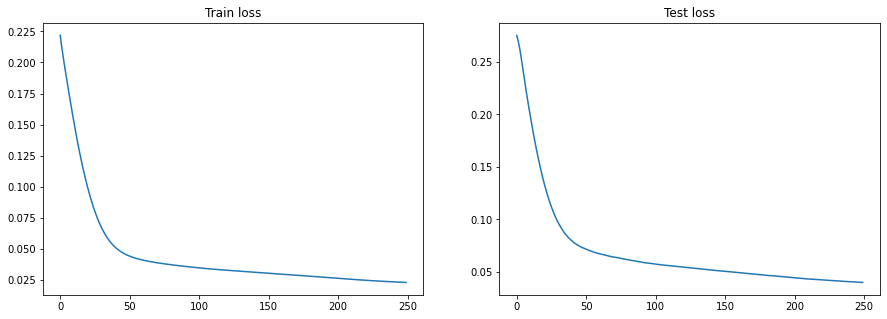

In [38]:
# Loss vs Epoch
plot_history(history)